## Assignment 1-Part 1
By Group 4: Qianjing Liang, Elouise Matthews, Naman Ratra, Luis Sejas

In [1]:
import numpy as np
import pandas as pd
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from IPython.display import display, Latex
%matplotlib inline
plt.rcParams['font.size']= 11

# Population size
N = 1

### $\textbf{Question (a)}$
After adding the compartment of D(ead), the new model, referred to as the SIRD model here, will be different from the original one:

1) The original $\gamma$, which represented the rate of removal, now only represents the rate of recovery, while the difference between the rate of removal and the rate of recovery is being represented by the newly introduced $\mu$, the rate of death.\
2) Since the introduction of $\mu$ doesn't affect the relationship between S(usceptible) and I(nfected), the following differential equation still stands: \
<font size="4"> $\frac{dS}{dt}$=-$\frac{\beta SI}{N}$ <font>

3) Meanwhile, in the new SIRD model, the compartment of I(nfected) will no longer only be affected by the R(ecovered) compartment, as the number of infectious population will also decrease due to the rate of death, i.e. $\mu$, and the relationship between them is as follows: (Note that in this equation, the meaning of $\gamma$, referring to the rate of Recovery, is different from its original meaning, which was the rate of Removal.) \
<font size="3"> $\frac{dI}{dt}$=$\frac{\beta SI}{N}$ - $\gamma*I$ - $\mu*I$ <font>

4) In addition, the changes of R(ecovered) over time have the same expression as before, as the meanings of R and $\gamma$ have changed at the same time: \
<font size="4"> $\frac{dR}{dt}$=$\gamma*I$ <font>

5) Lastly, the changes of D(ead) over time are expressed similarly to the R(ecovered). Therefore: \
<font size="4"> $\frac{dD}{dt}$=$\mu*I$ <font> 

Moreover, since the meaning of $\gamma$ has changed, the expression of the basic reproduction number, $R_{0}$ will also be changed now. By introducing $\mu$, $\gamma_{old}$ has been divided into two parts: $\gamma_{new}$ and $\mu$. Therefore, the new expression for $R_{0}$ will be: (the $\gamma$ in this expression refers to $\gamma_{new}$) \
<font size="4"> $R_{0}$ = $\frac{\beta}{\gamma + \mu}$ <font>

### Preparation for questions (b) and (c):

#### (1) A function to define the ODE system for the SIRD model

In [2]:
# SIRD model (coupled nonlinear system of ODEs)
def deriv(y, t, N, beta, gamma, miu):
    '''
    Returns the ordinary differential equation expressions
        Parameters:
            y (tuple): contains the initial values of S(usceptible), I(nfected),
                       R(ecovered), and D(ead)
            t (numpy array): a grid of time points
            N (int): size of population
            beta (float): contact rate
            gamma (float): recovery rate
            miu (float): mortality rate
    '''
    # Extract the values of S, I, R, and D from y
    S, I, R, D = y
    
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - miu * I
    dRdt = gamma * I
    dDdt = miu * I
    
    return dSdt, dIdt, dRdt, dDdt

#### (2) A function to calculate values of S, I, R, and D over time

In [3]:
def calculate_SIRD(I0, R0, D0, beta, gamma, miu, num_days):
    '''
    Returns vectors of S(usceptible), I(nfected), R(ecovered), and D(ead)  
    after integrating the SIRD equations based on initial conditions, 
    as well as the grid of time points.
        Parameters:
            I0 (float): proportion of initial infected population
            R0 (float): proportion of initial recovered population 
                        (normally set as 0)
            D0 (float): proportion of initial dead population 
                        (normally set as 0)
            beta (float): contact rate
            gamma (float): recovery rate
            miu (float): mortality rate
            num_days (int): number of days in the time frame to 
                            be analyzed
            
        Returns:
            four vectors of equal length--S, I, R, and D: represent 
            the proportion of susceptible, infected, recovered, and dead 
            population over the time frame
            t (numpy array): a grid of time points
    '''
    # Initially S0=N-I0-R0-D0
    S0 = N - I0 - R0 - D0
    
    # A grid of time points (in days)
    t = np.linspace(0, num_days, num_days)
    
    # Initial conditions vector
    y0 = S0, I0, R0, D0
    
    # Integrate the SIRD equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma, miu))
    S, I, R, D = ret.T # return vector

    return S, I, R, D, t

#### (3) A function to find the time point where $R_{0}$=1:

In [4]:
def R_effective_is_one(R_nought, S, N=1):
    '''
    Returns the time point where the value of R_effective is equal to one.
    '''
    t_1 = 0
    for time in range(0,len(S)):
        if R_nought*S[time]/N < 1: 
            t_1 = time
            break
    return t_1

#### (4) A function to plot the changes of S, I, R, D, as well as $R_{0}$ over time:

In [5]:
def plot_SIRD(ax,S,I,R,D,N,R_nought,t_1,show_days=150):
    '''
    Returns a plot of S, I, R, D and R_nought over a certain number of days. 
    The default time frame is set to be 150 days, for in most cases few 
    changes are observed after Day 150.
    '''
    ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S/usceptible')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I/nfected')
    ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R/ecovered')
    ax.plot(t, D/N, 'k', alpha=0.5, lw=2, label='D/ead')
    ax.plot(t, R_nought*S/N, 'gray', alpha=0.5, lw=2, label='R_effective')
    ax.vlines(t_1, 0, max(R_nought*S/N), colors='k', 
              linestyles='dashed') # plot line where R_effective=1
    
    # Add labels, text, axis limits, and legend
    ax.set_xlabel('Time / days')
    ax.set_ylabel('Fraction')
    ax.set_xlim(0,show_days)
    ax.set_ylim(0, max(R_nought*S/N))
    ax.text(0.6,0.5,"R_eff=1 at t="+ str(t_1)+"d",transform = ax.transAxes)
    ax.legend()

#### (5) A function to print out the fixed parameters' values in different studying cases:

In [6]:
def print_fix_param(i_0, r_0, d_0, beta=False, gamma=False,
                    miu=False, r_nought=False):
    print("Fixed parameters include:")
    if beta != False:
        display(Latex(r'$\beta$:'))
        print(beta)
    if gamma != False:
        display(Latex(r'$\gamma$:'))
        print(gamma)
    if miu != False:
        display(Latex(r'$\mu$:'))
        print(miu)
    if r_nought != False:
        print("R\u2080(R_nought)=", r_nought)
    print("I(t=0)=", i_0)
    print("R(t=0)=", r_0)
    print("D(t=0)=", d_0)

### $\textbf{Question (b)}$

#### (b-1) Effect of uncertainty from $R_{0}$ on the prediction of D at t=365d and accumulated number of deaths after a year($R_{0}$ $\in$ [3.0,4.0])
To study the effect of the change in $R_{0}$ and the potential effects from the value of $\mu$, two cases are explored in this section, which set the value of $\mu$ at its lowest (0.4%) and highest (4%) value repectively. 
In both cases, all other parameters are fixed and set as follows: \
$\gamma$=3%, the initial infected percentage is set as 1.8%, initial percentages of recovered and dead population are both 0. 

Therefore, given that $R_{0}$ = $\beta$ / ($\mu$+$\gamma$), the value of $R_{0}$ can be varied by changing the value of $\beta$. ($\beta$ = $R_{0}$ * ($\mu$+$\gamma$))

Fixed parameters include:


<IPython.core.display.Latex object>

0.03


<IPython.core.display.Latex object>

0.004
I(t=0)= 0.018
R(t=0)= 0
D(t=0)= 0


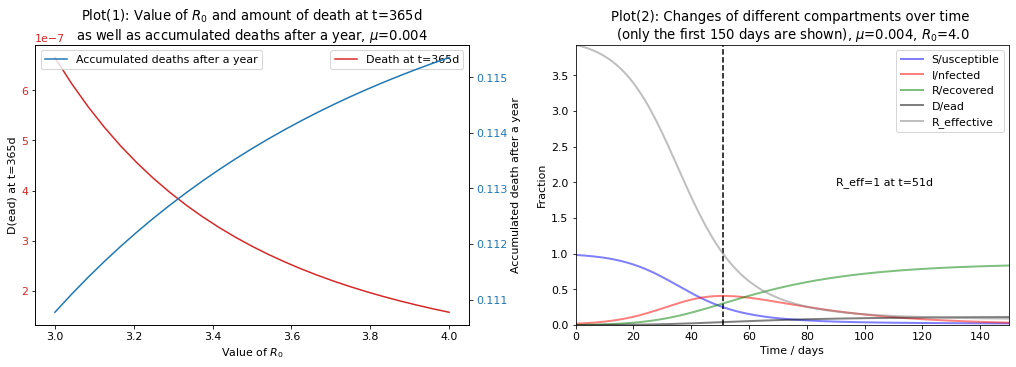

Fixed parameters include:


<IPython.core.display.Latex object>

0.03


<IPython.core.display.Latex object>

0.04
I(t=0)= 0.018
R(t=0)= 0
D(t=0)= 0


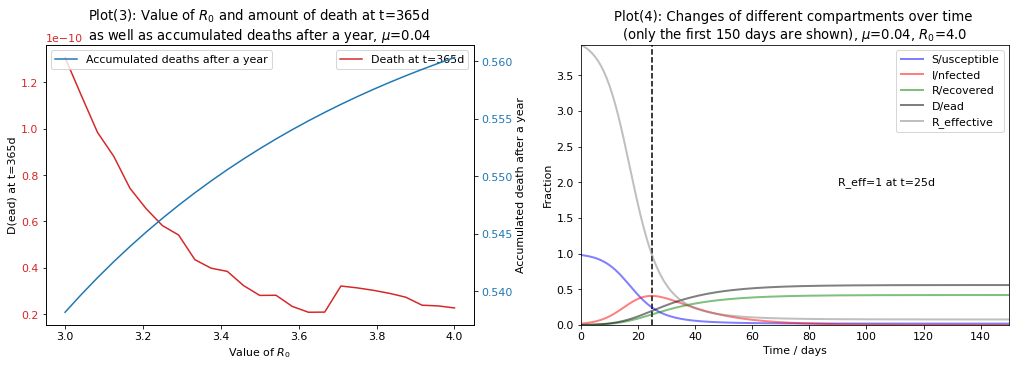

In [7]:
R_range = np.linspace(3, 4, 25)
mius = [0.004, 0.04]
gamma = 0.03
I0, R0, D0 = 0.018, 0, 0

for i in range(2):
    miu = mius[i]
    fig1, ax1 = plt.subplots(1,2,figsize=(14,5),constrained_layout=True)
    print_fix_param(miu=miu, gamma=gamma, i_0=I0, r_0=R0, d_0=D0)
    D_365, D_total = [], []
    for r in R_range:
        beta = r * (miu + gamma)
        S, I, R, D, t = calculate_SIRD(I0=I0, R0=R0, D0=D0, beta=beta, 
                                       gamma=gamma, miu=miu, num_days=365)
        D_365.append(D[-1] - D[-2])
        D_total.append(D[-1])
    
    # Plot the relationship between the amount of death at t=365d and the 
    # value of R_nought
    ax1[0].plot(R_range, D_365, color='tab:red', label='Death at t=365d')
    ax1[0].set_ylabel('D(ead) at t=365d')
    ax1[0].set_xlabel('Value of $R_{0}$')
    ax1[0].tick_params(axis='y', labelcolor='tab:red')
    ax1[0].legend()
    ax1[0].set_title("Plot("+str(2*i+1)+"): "+"Value of $R_{0}$ and amount"+\
                     " of death at t=365d \n"+"as well as accumulated"+\
                     " deaths after a year, $\mu$=" + str(miu), 
                     loc='center', wrap=True)

    # Plot the relationship between the number of accunulated death after a year
    # and the value of R_nought
    ax2 = ax1[0].twinx()
    ax2.plot(R_range, D_total, color='tab:blue', 
             label='Accumulated deaths after a year')
    ax2.set_ylabel('Accumulated death after a year')
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    ax2.legend()
    
    # Plot the changes in S,I,R,D, and R_nought over time
    ax3 = ax1[1]
    ax3.set_title("Plot("+str(2*i+2)+"): "+'Changes of different compartments'+\
                  ' over time \n'+'(only the first 150 days are shown),'
                  ' $\mu$='+str(miu)+', $R_{0}$='+str(r))
    t_1 = R_effective_is_one(r, S, N)
    plot_SIRD(ax3, S, I, R, D, N, r, t_1)
    plt.show()

#### TAKE HOME MESSAGE:
Plot (1) shows that as $R_{0}$ increases, the proportion of death at t=365d decreases, while the value of accumulated deaths after a year increases.

Plot (2) shows that when $\mu$=0.4%, the peak of of I(nfected) occurs on around the 51st day, and all curves seem to become stable when it approaches 150 days.

Plot (3) shows that as $R_{0}$ increases, the proportion of death at t=365d decreases, while the value of accumulated deaths after a year increases.

Plot (4) shows that when $\mu$=4%, the peak of of I(nfected) occurs on around the 25th day, and all curves seem to become stable when it approaches 80 days.

Summary: in general, the value of $R_{0}$ has a negative relation with the proportion of death at t=365d and positive relation with the accumulated deaths after a year. This is because as $R_{0}$ increases, the seriousness of the disease also goes up, causing the peak of infection (and thus peak of increased deaths) to occur earlier, and thus the amount of deaths on the 365th day will be lower, while the death number in total will be higher. Meanwhile, the value of $\mu$ also has a similar effect of making the peak occur earlier as it increases.

#### (b-2) Effect of uncertainty from $\mu$ on the prediction of D at t=365d and accumulated number of deaths after a year($\mu$ $\in$ [0.4%,4%])
To study the effect of the change in $\mu$ and the potential effects from the value of $R_{0}$, two cases are explored in this section, which set the value of $R_{0}$ at its lowest (3.0) and highest (4.0) value repectively. In both cases, all other parameters are fixed and set as follows: \
$\gamma$=3%, the initial infected percentage is set as 1.8%, initial percentages of recovered and dead population are both 0.

Therefore, given that $R_{0}$ = $\beta$ / ($\mu$+$\gamma$), the value of $\mu$ can be varied by changing the value of $\beta$. ($\beta$ = $R_{0}$ * ($\mu$+$\gamma$))

Fixed parameters include:


<IPython.core.display.Latex object>

0.03
R₀(R_nought)= 3
I(t=0)= 0.018
R(t=0)= 0
D(t=0)= 0


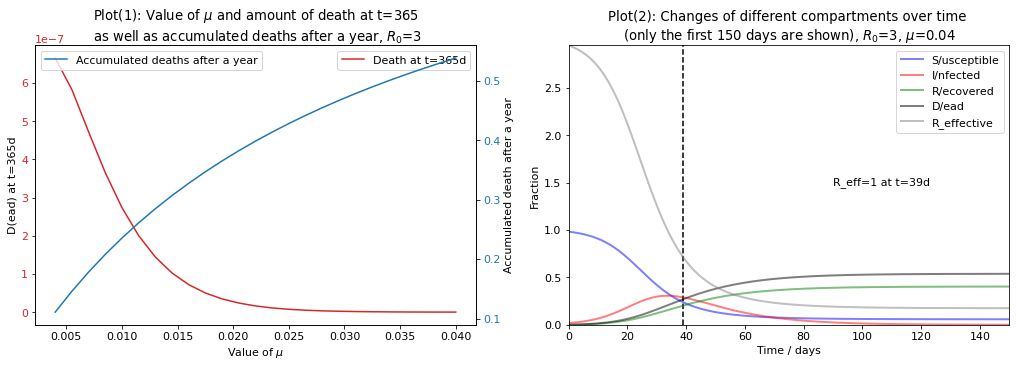

Fixed parameters include:


<IPython.core.display.Latex object>

0.03
R₀(R_nought)= 4
I(t=0)= 0.018
R(t=0)= 0
D(t=0)= 0


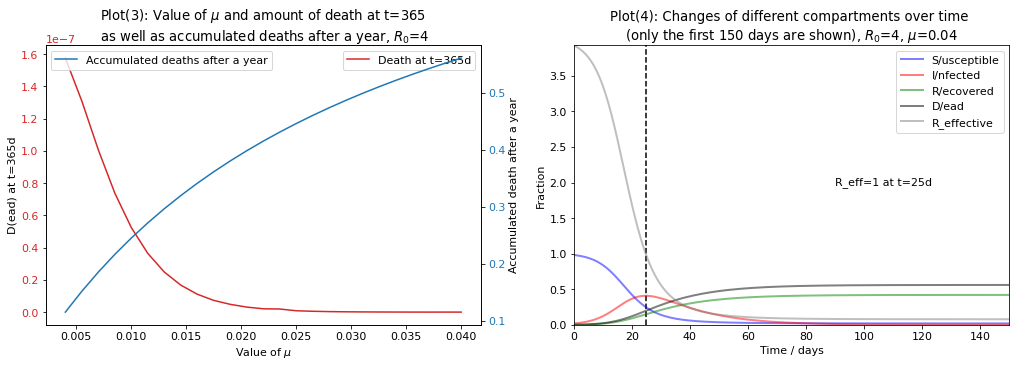

In [8]:
miu_range = np.linspace(0.004, 0.04, 25)
R_noughts = [3,4]
gamma = 0.03
I0, R0, D0 = 0.018, 0, 0

for i in range(2):
    R_nought=R_noughts[i]
    fig2, ax4 = plt.subplots(1,2,figsize=(14,5),constrained_layout=True)
    print_fix_param(r_nought=R_nought,gamma=gamma, i_0=I0, r_0=R0, d_0=D0)
    D_365, D_total = [], []
    for miu in miu_range:
        # Calculation of beta
        beta = R_nought * (miu + gamma)
        S, I, R, D, t = calculate_SIRD(I0=I0, R0=R0, D0=D0, beta=beta, 
                                       gamma=gamma, miu=miu, num_days=365)
        D_365.append(D[-1] - D[-2])
        D_total.append(D[-1])
    
    # Plot the relationship between the number of death at t=365 and the 
    # value of miu
    ax4[0].plot(miu_range, D_365, color='tab:red', label='Death at t=365d')
    ax4[0].set_ylabel('D(ead) at t=365d')
    ax4[0].set_xlabel('Value of $\mu$')
    ax4[0].tick_params(axis='y', labelcolor='tab:red')
    ax4[0].set_title("Plot("+str(2*i+1)+"): "+"Value of $\mu$ and "+\
                     "amount of death at t=365\n as well as accumulated "+\
                     "deaths after a year, $R_{0}$=" + str(R_nought), 
                     loc='center', wrap=True)

    # Plot the relationship between the number of accunulated death after 
    # a year and the value of miu
    ax5 = ax4[0].twinx()
    ax5.plot(miu_range, D_total, color='tab:blue', 
             label='Accumulated deaths after a year')
    ax5.set_ylabel('Accumulated death after a year')
    ax5.tick_params(axis='y', labelcolor='tab:blue')
    
    ax5.legend()
    ax4[0].legend()
    
    # Plot the changes in S,I,R,D, and R_nought over time
    ax6 = ax4[1]
    ax6.set_title("Plot("+str(2*i+2)+"): "+'Changes of different ' +\
                  'compartments over time \n(only the first '
                  '150 days are shown), $R_{0}$='+ str(R_nought)+\
                  ', $\mu$='+str(miu))
    t_1 = R_effective_is_one(r, S, N)
    plot_SIRD(ax6,S,I,R,D,N,R_nought,t_1)
    plt.show()

#### TAKE HOME MESSAGE:
Plot (1) shows that as $\mu$ increases, the proportion of death at t=365d decreases, while the value of accumulated deaths after a year increases.

Plot (2) shows that when $R_{0}$=3.0, the peak of of I(nfected) occurs on around the 39th day, and all curves seem to become stable when it approaches 100 days.

Plot (3) shows that as $\mu$ increases, the proportion of death at t=365d decreases, while the value of accumulated deaths after a year increases.

Plot (4) shows that when $R_{0}$=4.0, the peak of of I(nfected) occurs on around the 25th day, and all curves seem to become stable when it approaches 80 days.

Summary: in general, the value of $\mu$ has a negative relation with the proportion of death at t=365d and positive relation with the accumulated deaths after a year. This is because as $\mu$  increases, the seriousness of the disease also goes up, causing the peak of increased deaths to occur earlier, and thus the amount of deaths on the 365th day will be lower, while the death number in total will be higher. Meanwhile, the value of $R_{0}$ also hasa similar effect of making the peak occur earlier as it increases.

### $\textbf{Question (c)}$

#### (c-1) Since $\beta$ represents the contact rate, its value should be reduced during a hard lockdown compared to a soft one. For comparison purposes, a $\beta$ value of 12% is set for a hard lockdown while a $\beta$ value of 35% is set for a soft lockdown
Suppose the values of $\gamma$ and $\mu$ are fixed: $\gamma$=3%, $\mu$=0.5%. The initial infected percentage is set as 1.8%, initial percentages of recovered and dead population are both 0.

Fixed parameters include:


<IPython.core.display.Latex object>

0.03


<IPython.core.display.Latex object>

0.005
I(t=0)= 0.018
R(t=0)= 0
D(t=0)= 0


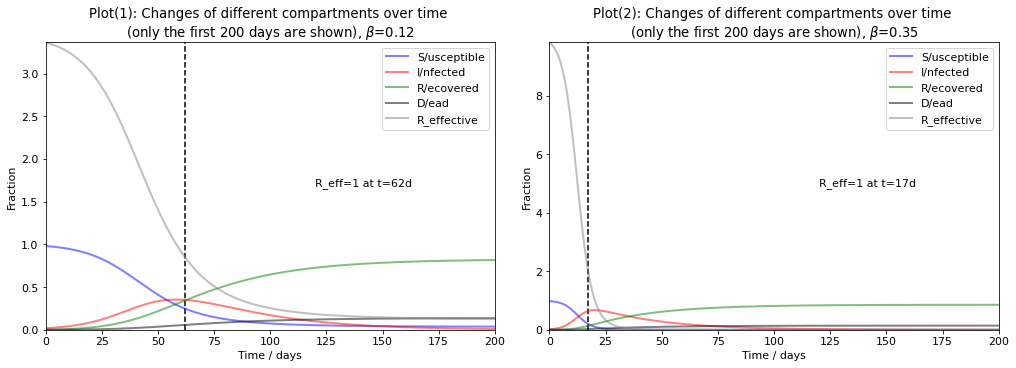

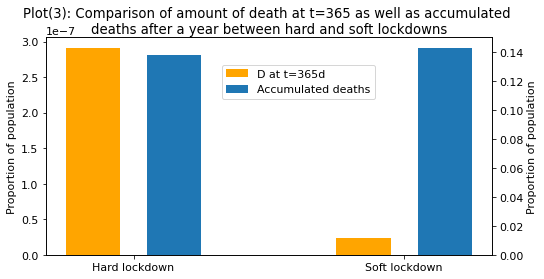

In [9]:
miu = 0.005
gamma = 0.03
beta_hard = 0.12
beta_soft = 0.35
I0, R0, D0 = 0.018, 0, 0
D_365, D_total = [], []
betas = [beta_hard, beta_soft]

print_fix_param(miu=miu,gamma=gamma, i_0=I0, r_0=R0, d_0=D0)
fig3, ax7 = plt.subplots(1,2,figsize=(14,5),constrained_layout=True)

for i in range(2):
    beta = betas[i]
    R_nought = beta / (miu + gamma)
    S, I, R, D, t = calculate_SIRD(I0=I0, R0=R0, D0=D0, beta=beta, 
                                   gamma=gamma, miu=miu, num_days=365)
    D_365.append(D[-1] - D[-2])
    D_total.append(D[-1])
    
    ax8 = ax7[i]
    ax8.set_title("Plot("+str(i+1)+"): "+'Changes of different ' +\
                  'compartments over time \n(only the first '
                  '200 days are shown), ' r'$\beta$='+ str(beta))
    t_1 = R_effective_is_one(r, S, N)
    plot_SIRD(ax8,S,I,R,D,N,R_nought,t_1,show_days=200)
    
labels = ['Hard lockdown', 'Soft lockdown']
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig4, ax9 = plt.subplots(figsize=(8,4))
ax9.bar(x - width, D_365, 0.2, color = 'orange', 
        label='D at t=365d')
ax9.set_xticks(x)
ax9.set_xticklabels(labels)
ax9.set_title("Plot(3): Comparison of amount of death at t=365 "+\
              "as well as accumulated \ndeaths after a year between "+\
              "hard and soft lockdowns", loc='center', wrap=True)

ax10 = ax9.twinx()
ax10.bar(x + width, D_total, 0.2, label='Accumulated deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax9.set_ylabel('Proportion of population')
ax10.set_ylabel('Proportion of population')

fig4.legend(bbox_to_anchor=(0.75,0.9), bbox_transform=ax9.transAxes)
plt.show()

#### TAKE HOME MESSAGE:
Plot (1) shows that when $\beta$=12%, the peak of of I(nfected) occurs on around the 62nd day, and all curves seem to become stable when it approaches 150 days.

Plot (2) shows that when $\beta$=35%, the peak of of I(nfected) occurs on around the 17th day, and all curves seem to become stable when it approaches 100 days.

Plot (3) shows that compared to a soft lockdown, which has a higher $\beta$, a hard lockdown will result in a higher amount of deaths on the 365th day, while the total number of deaths will be lower.

#### (2) Instead of giving specific examples of the value of $\beta$ and observe the differences between hard and soft lockdowns, an alternative is plotting the relationship between the value of $\beta$ and the corresponding value of deaths at t=365d and accumulated deaths after a year
Parameters $\gamma$ and $\mu$ as well as the initial conditions are assumed to be fixed: $\gamma$=4%, $\mu$=1%. \
The initial infected percentage is set as 1.8%, initial percentages of recovered and dead population are both 0.

Fixed parameters include:


<IPython.core.display.Latex object>

0.04


<IPython.core.display.Latex object>

0.01
I(t=0)= 0.018
R(t=0)= 0
D(t=0)= 0


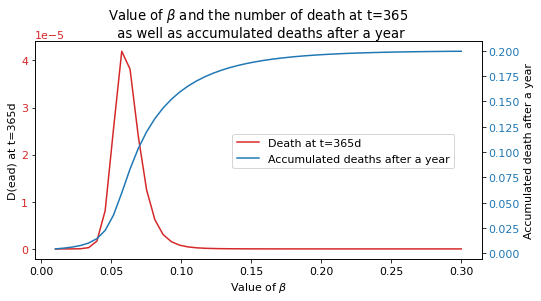

In [10]:
beta_range = np.linspace(0.01, 0.3, 50)
gamma = 0.04
miu = 0.01
I0, R0, D0 = 0.018, 0, 0
D_365, D_total = [], []

print_fix_param(miu=miu,gamma=gamma, i_0=I0, r_0=R0, d_0=D0)

for beta in beta_range:
    S, I, R, D, t = calculate_SIRD(I0=I0, R0=R0, D0=D0, beta=beta, 
                                   gamma=gamma, miu=miu, num_days=365)
    D_365.append(D[-1] - D[-2])
    D_total.append(D[-1])

# Plot the relationship between the number of death at t=365 and 
# the value of beta
fig5, ax11 = plt.subplots(figsize=(8,4))
ax11.plot(beta_range, D_365, color='tab:red', label='Death at t=365d')
ax11.set_ylabel('D(ead) at t=365d')
ax11.set_xlabel('Value of ' r'$\beta$')
ax11.tick_params(axis='y', labelcolor='tab:red')
ax11.set_title("Value of " r'$\beta$' + " and the number of death "+\
               "at t=365\n as well as accumulated deaths "+\
               "after a year", loc='center', wrap=True)

# Plot the relationship between the number of accunulated death after 
# a year and the value of beta
ax12 = ax11.twinx()
ax12.plot(beta_range, D_total, color='tab:blue', 
          label='Accumulated deaths after a year')
ax12.set_ylabel('Accumulated death after a year')
ax12.tick_params(axis='y', labelcolor='tab:blue')

fig5.legend(bbox_to_anchor=(0.95,0.6), bbox_transform=ax11.transAxes)
plt.show()

#### TAKE HOME MESSAGE:
The plot above shows that as $\beta$ increases, the amount of death on the 365th day will first increase, and as $\beta$ is more than around 6%, will decrease. In comparison, as $\beta$ increases, the accumulated deaths after a year will always increase.

Summary: in general, the value of $\beta$ has a negative relation with the proportion of death at t=365d (except for very small values of $\beta$) and positive relation with the accumulated deaths after a year. This is because as $\beta$  increases, the seriousness of the disease also goes up, causing the peak of infection (and thus the peak of deaths) to occur earlier, and thus the amount of deaths on the 365th day will be lower (if the value of $\beta$ is not so low that there is barely a peak), while the death number in total will be higher.

### $\textbf{Question (b-c)}$
#### Plotting of R (the effective reproduction number) as a function of t:
Assuming that the initial infected percentage is 1.8%, initial percentages of recovered and dead population are both 0; $\mu$=1%, $\gamma$=5%, and $\beta$=20%

Fixed parameters include:


<IPython.core.display.Latex object>

0.2


<IPython.core.display.Latex object>

0.05


<IPython.core.display.Latex object>

0.01
R₀(R_nought)= 3.333333333333333
I(t=0)= 0.018
R(t=0)= 0
D(t=0)= 0


Text(0.5, 1.0, 'Value of the effective reproduction number R over time')

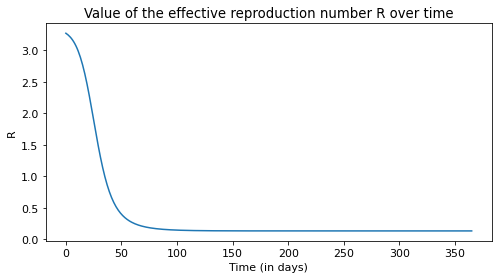

In [11]:
miu = 0.01
gamma = 0.05
beta = 0.2
R_nought = beta / (gamma+miu)
I0, R0, D0 = 0.018, 0, 0
D_365, D_total = [], []

print_fix_param(miu=miu,gamma=gamma, i_0=I0, r_0=R0, d_0=D0, 
                r_nought=R_nought,beta=beta)
S, I, R, D, t = calculate_SIRD(I0=I0, R0=R0, D0=D0, beta=beta, 
                               gamma=gamma, miu=miu, num_days=365)
R_effective = R_nought*S/N

# Plot the changes in the effective reproduction number over time
fig6, ax13 = plt.subplots(figsize=(8,4))
ax13.plot(t, R_effective)
ax13.set_ylabel('R')
ax13.set_xlabel('Time (in days)')
ax13.set_title("Value of the effective reproduction number R over time", 
               loc='center', wrap=True)

#### TAKE HOME MESSAGE:
Over time, as the proportion of S(usceptible) population decreases, the value of the effective reproduction number R will decrease.